In [1]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import itertools
import numpy as np
from matplotlib import pyplot as plt
import requests

In [3]:
uri = "localhost:27017"
client = MongoClient(uri, server_api=ServerApi('1'))

client.admin.command('ping')

db = client.test
historical_evolution_data = db.historicalEvolutionData
problem_instances = db.probleminstances
db_prelim_information = db.prelimInformation
conflict_evolution_data = db.conflictEvolutionData

generator_colors = {
    "SimpleGenerator" : "orange",
    "RealisticGenerator" : "blue",
    "LocalSearchController" : "green"
}

plt_xlim = [-0.05,1.05]
plt_ylim = [-0.05,1.05]

experiment_id = "22-08"

x_axis_feature = "blockedPassengerRatio"
y_axis_feature = "conflictFreePassengerSeatingRatio"


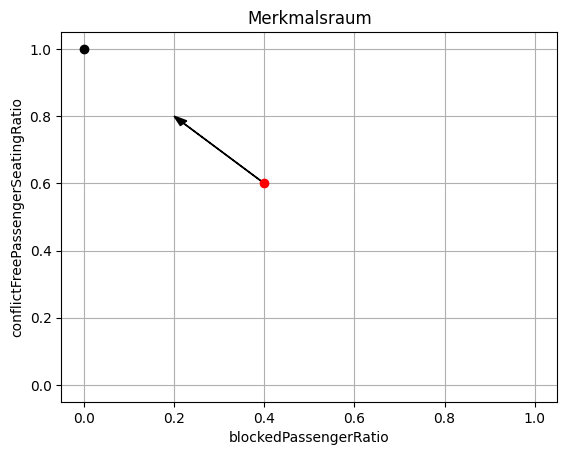

In [22]:
plt.title("Merkmalsraum")
plt.xlabel(x_axis_feature)
plt.ylabel(y_axis_feature)

ax = plt.gca()
ax.set_axisbelow(True)

plt.arrow(0.4,0.6,-0.2,0.2, length_includes_head=True, head_width=0.02, head_length=0.03, fc='k', ec='k')

plt.scatter(0.4,0.6, color="red")
plt.scatter(0.0,1.0, color="black")



plt.xlim(plt_xlim)
plt.ylim(plt_ylim)
    
plt.grid()
plt.show()

In [6]:
def post_conflict_evolution(mutation_name):
    url = 'http://localhost:8080/conflict/evolution'
    data = {
    "experimentId" : "22-08",
    "instanceCount" : 50,
    "mutationName" : mutation_name
    }
    
    requests.post(url, json=data)


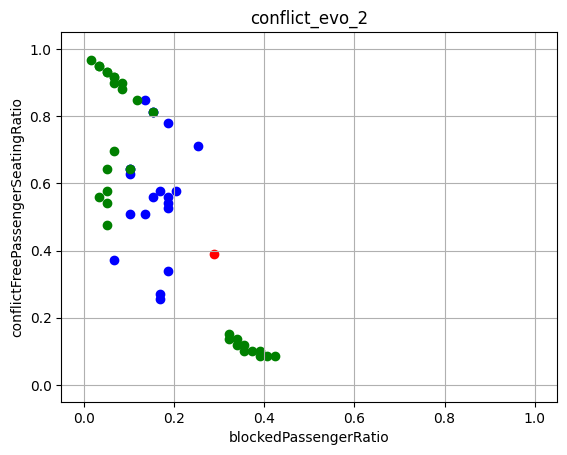

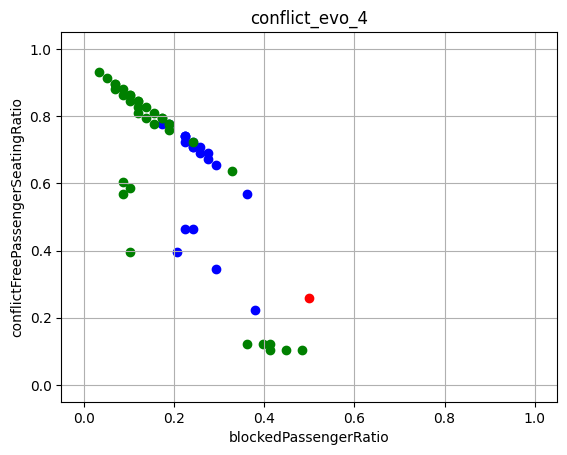

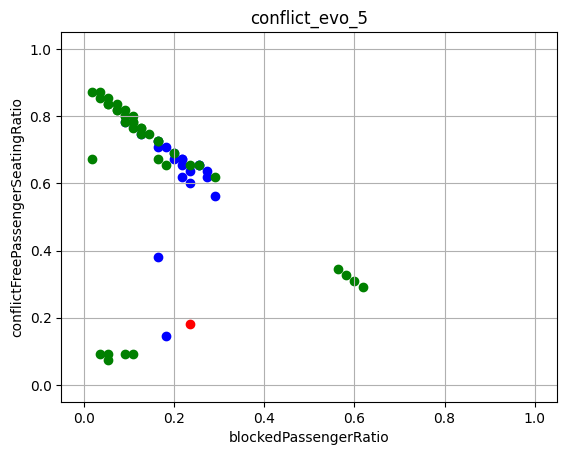

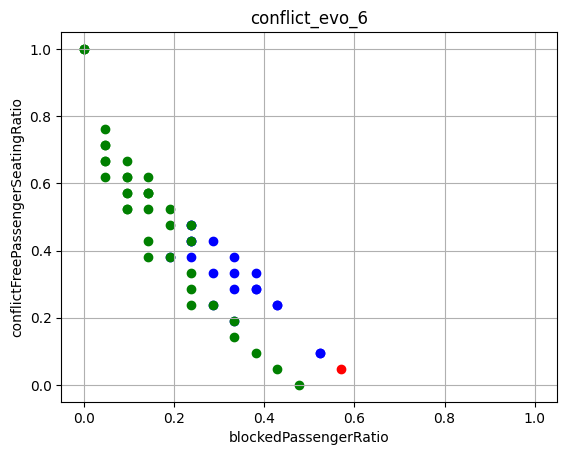

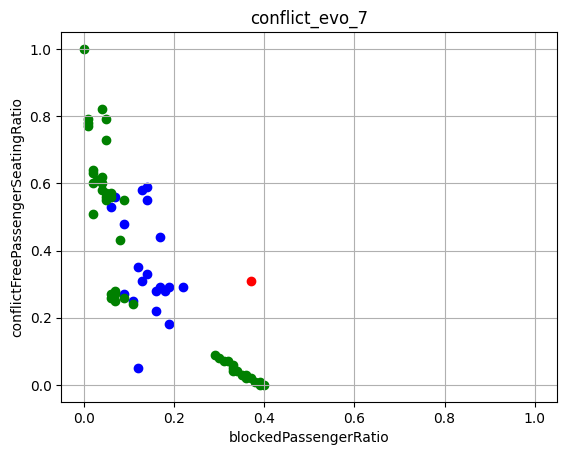

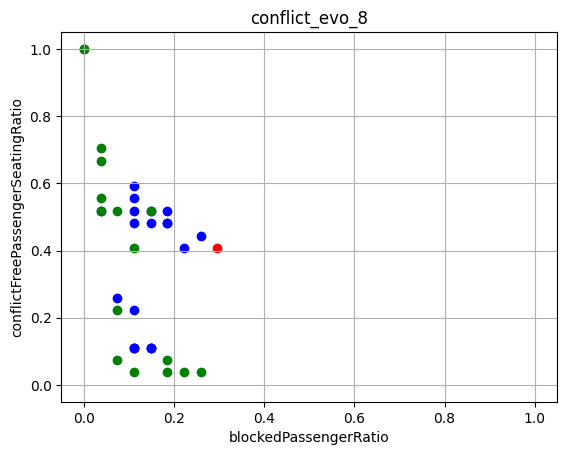

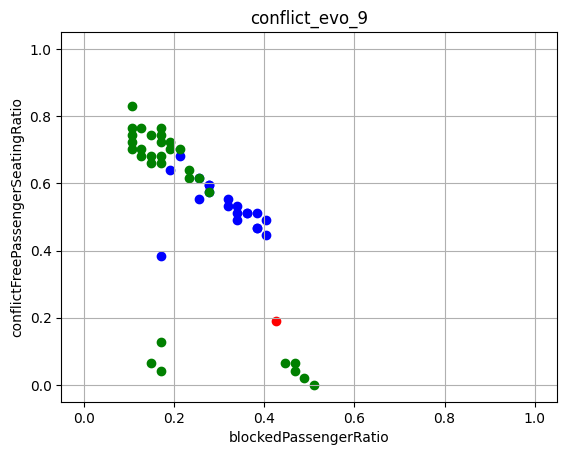

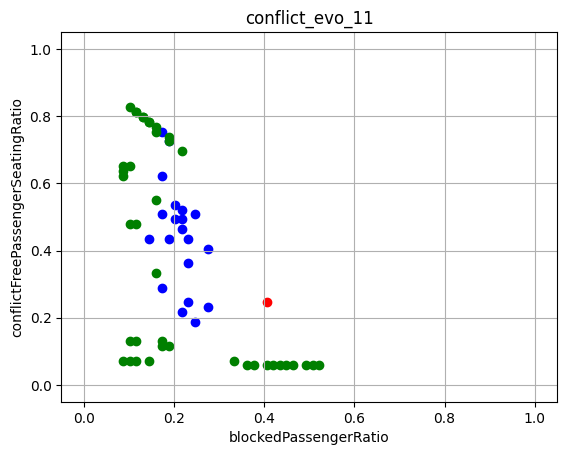

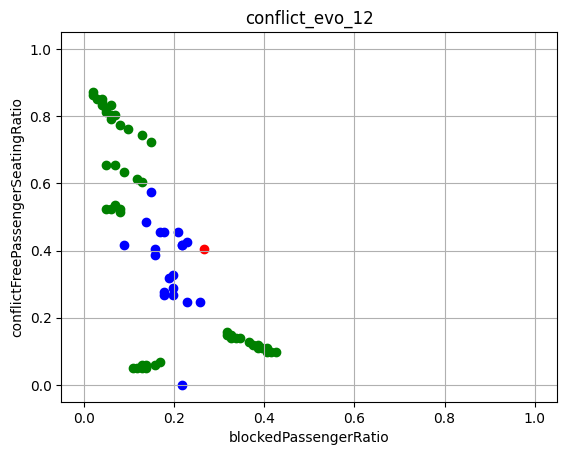

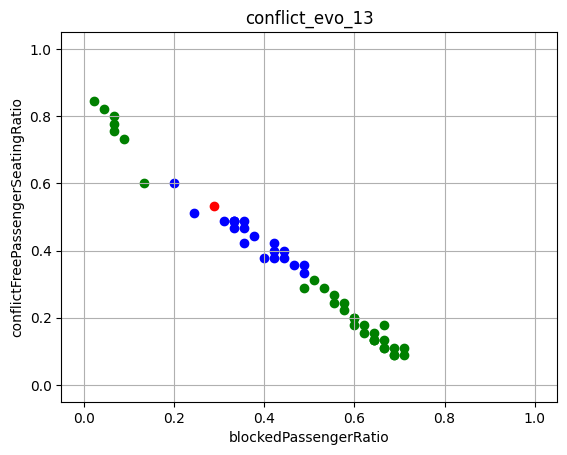

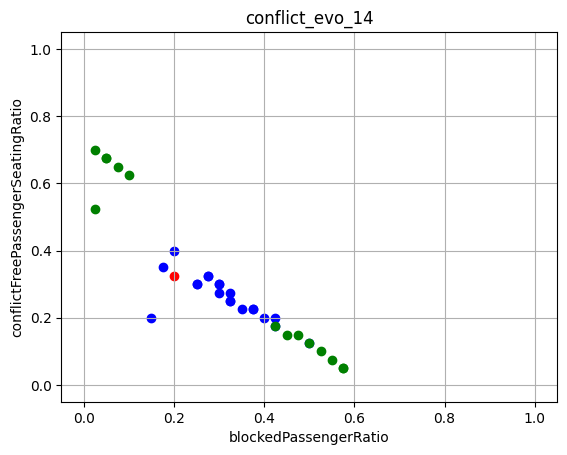

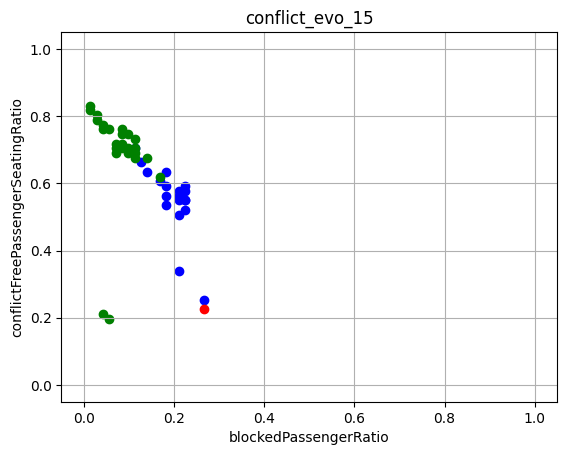

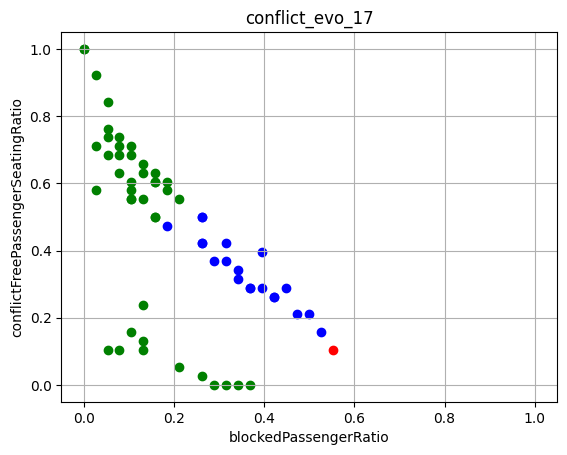

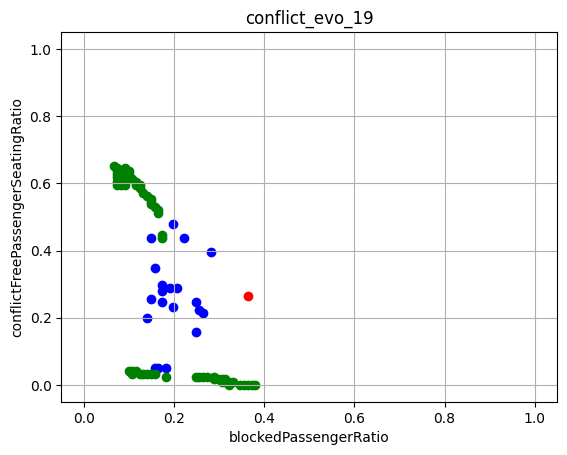

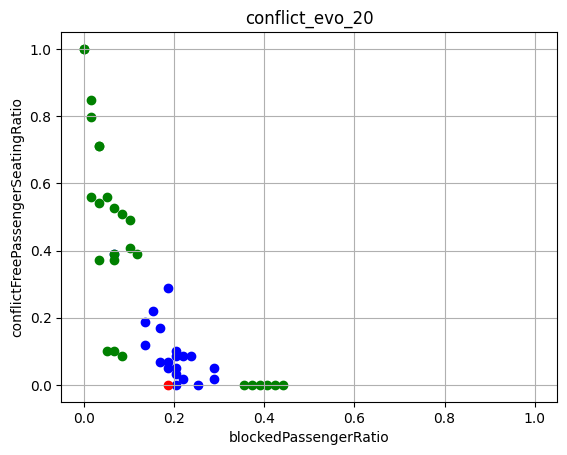

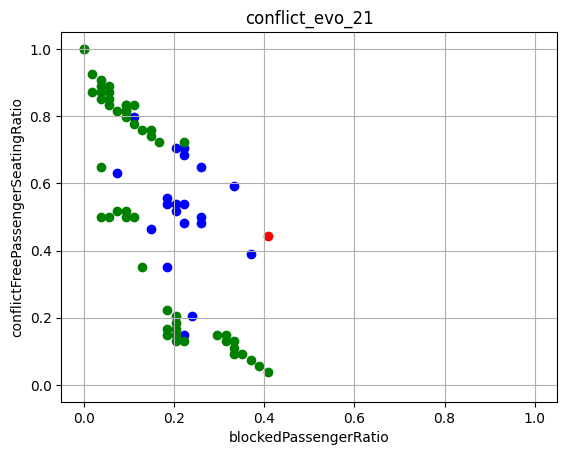

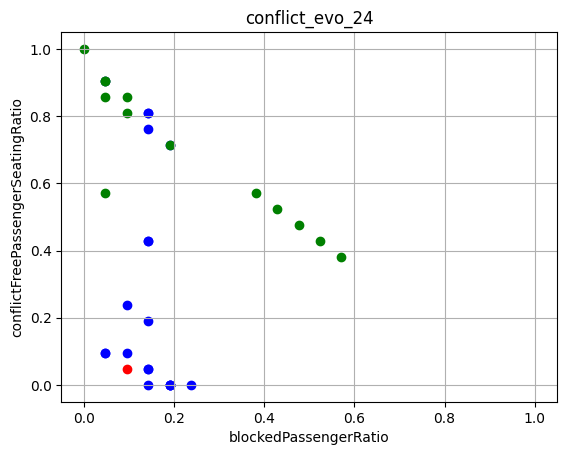

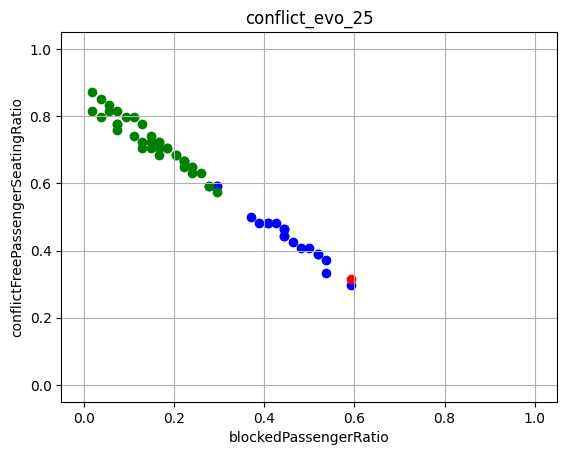

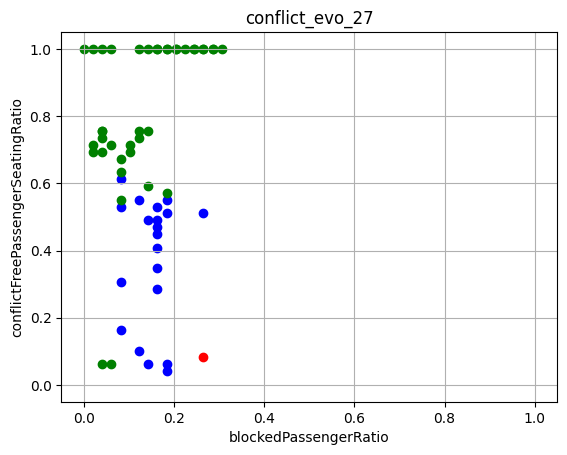

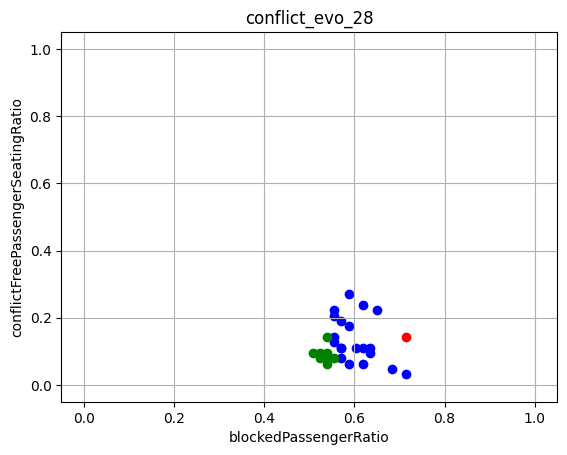

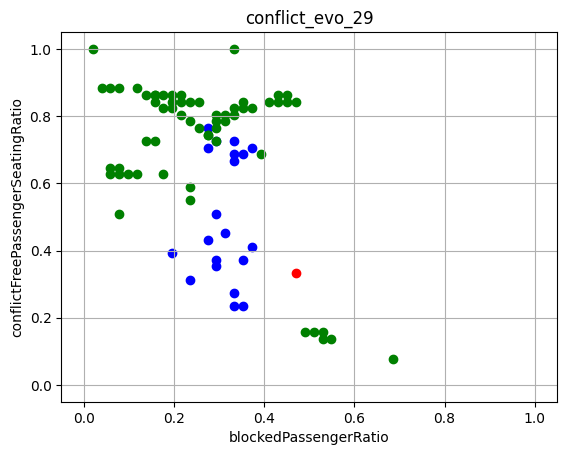

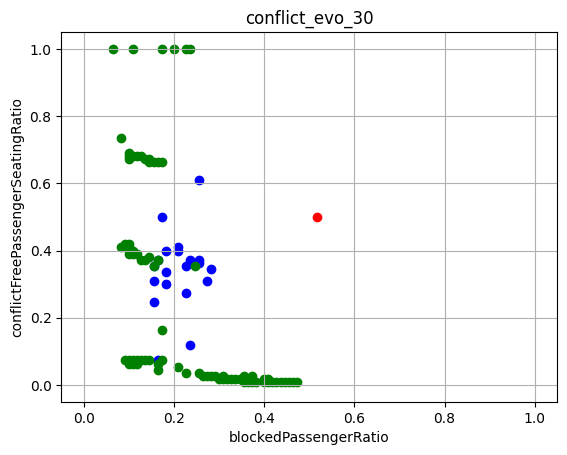

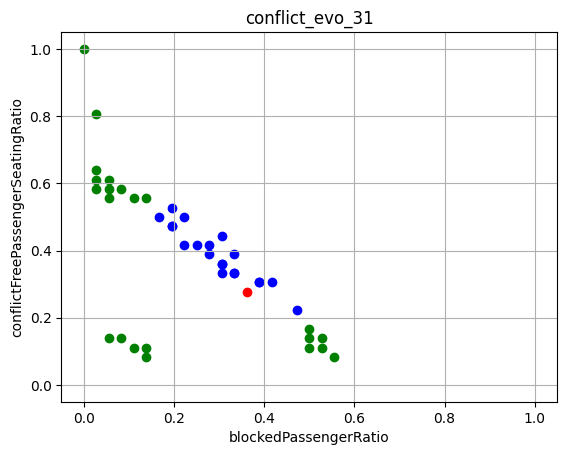

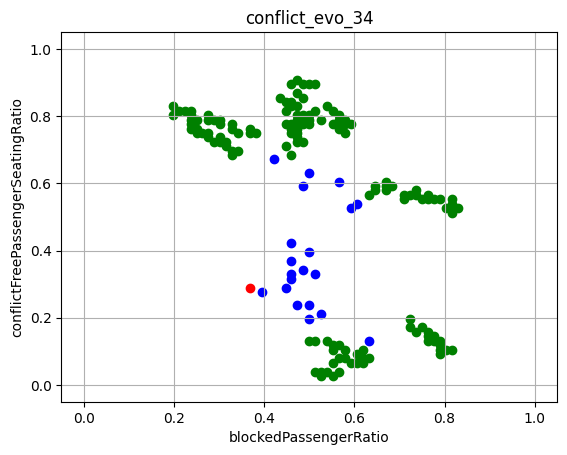

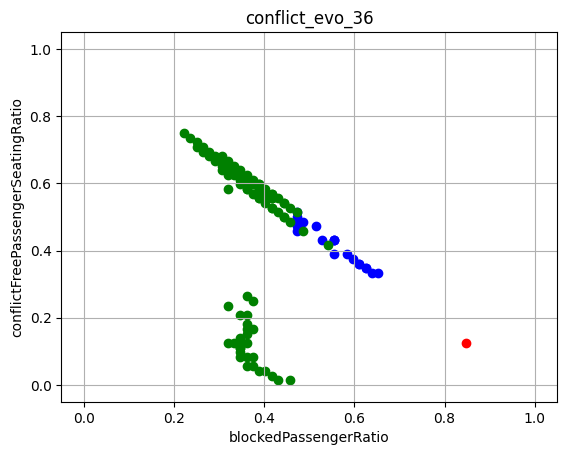

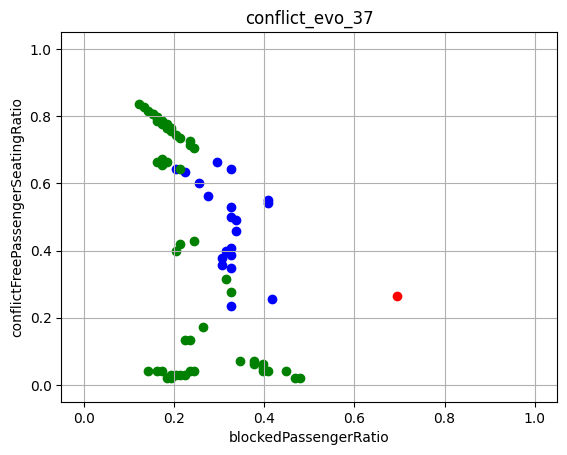

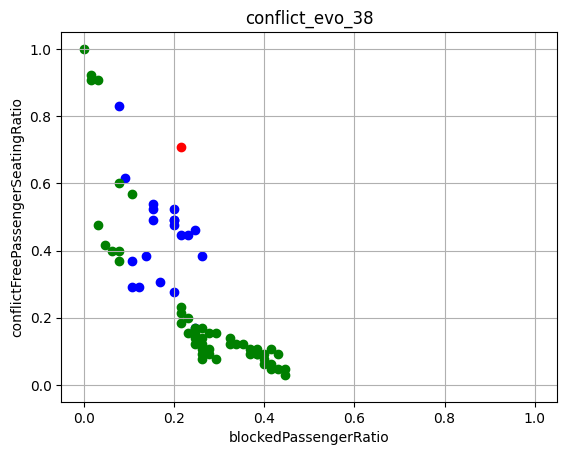

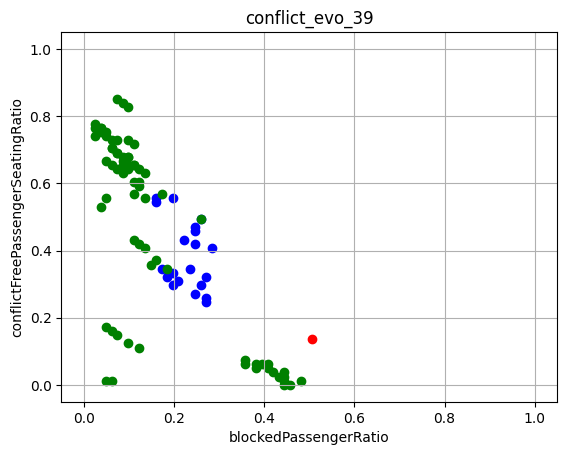

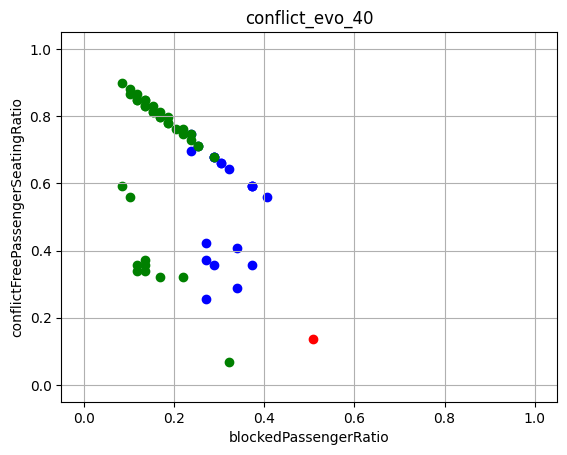

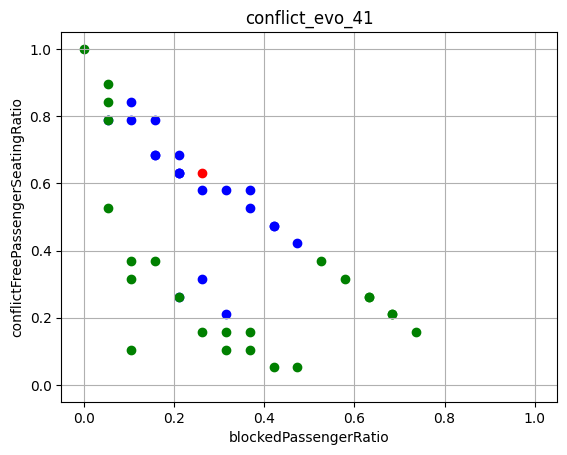

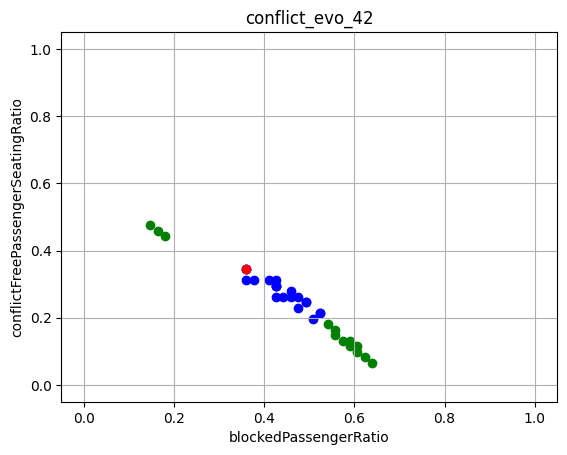

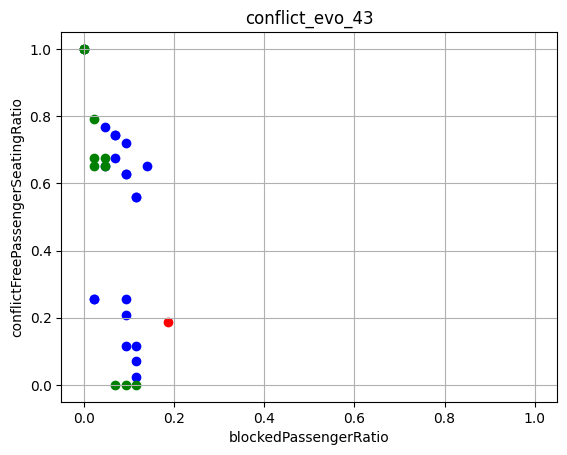

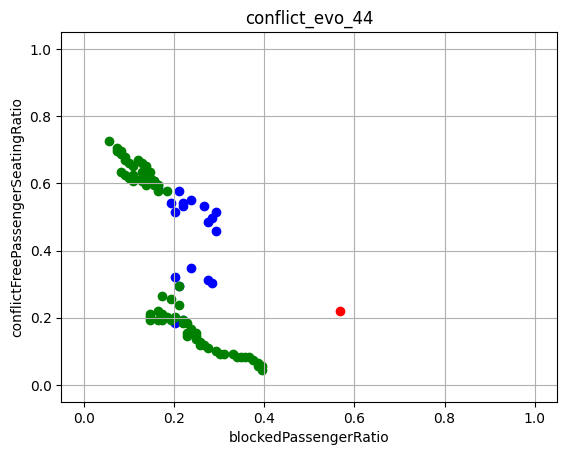

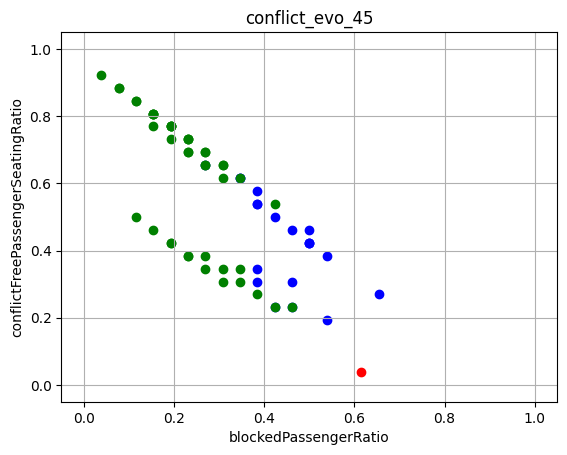

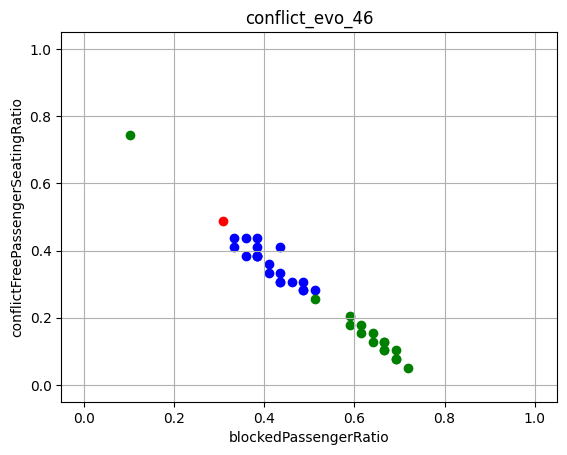

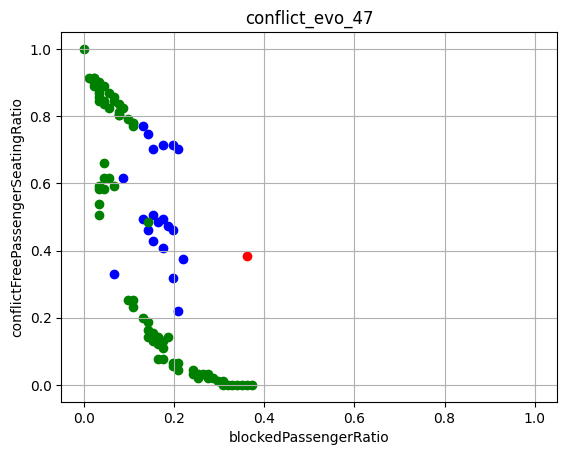

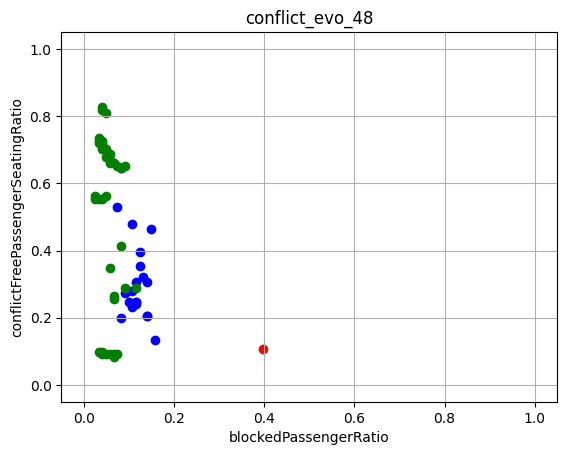

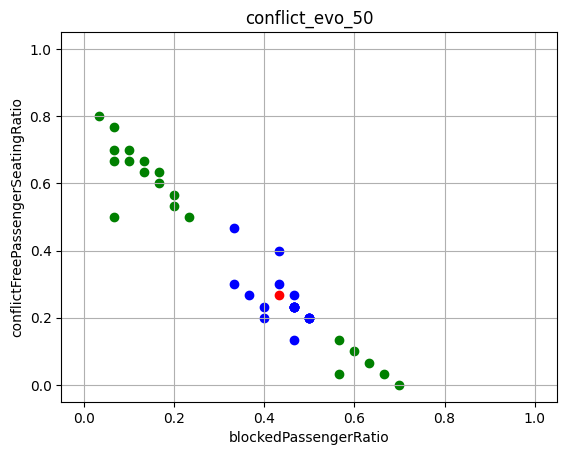

In [7]:
conflict_evolution_data.delete_many({"experimentId" : experiment_id})

#post_conflict_evolution("MoveInOrOutPositionMutation")

conflict_evolution = list(conflict_evolution_data.find({"experimentId" : experiment_id}))

def plot_conflict_evolution(evolution_data):
    start_generation_x_coords = [data[x_axis_feature] for data in evolution_data["startGeneration"]]
    start_generation_y_coords = [data[y_axis_feature] for data in evolution_data["startGeneration"]]
    plt.scatter(start_generation_x_coords, start_generation_y_coords, color= "blue")

    for history in evolution_data["coordinateHistories"]:
        history_x_coords = [data[x_axis_feature] for data in history]
        history_y_coords = [data[y_axis_feature] for data in history]
        plt.scatter(history_x_coords, history_y_coords, color= "green")

    plt.scatter(evolution_data["startCoordinates"][x_axis_feature],evolution_data["startCoordinates"][y_axis_feature], color="red")

    plt.title(evolution_data["instanceId"])
    plt.xlabel(x_axis_feature)
    plt.ylabel(y_axis_feature)

    plt.xlim(plt_xlim)
    plt.ylim(plt_ylim)
    
    plt.grid()
    plt.show()



for ce in conflict_evolution:
    plot_conflict_evolution(ce)